<a href="https://colab.research.google.com/github/anushka-png/Iris-prediction-using-decision-tree-classifier/blob/main/IRIS_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NAME- ANUSHKA SHARMA 
PREDICTION USING DECISION TREE CLASSIFIER 


In [ ]:
#importing  various libraries for analysis and visualisation of data 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

#reading the iris data set file 
Iris_data= pd.read_csv("Iris.csv",sep=",")
Iris_data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [ ]:
#extracting basic information about the data 
Iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [ ]:
Iris_data.head(20)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [ ]:
#extracting the information in numerical form 
Iris_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
# indicating the number of features in  each and every species
Iris_data.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

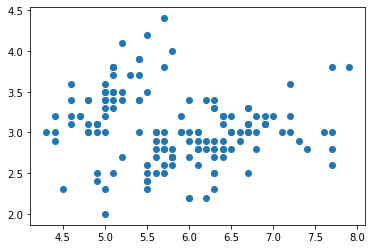

In [ ]:
#visualizing dataset
plt.scatter(Iris_data['SepalLengthCm'],Iris_data['SepalWidthCm'])
plt.show()

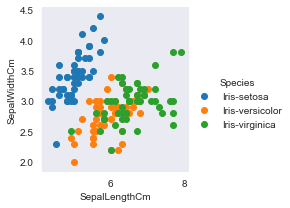

In [ ]:
#visualizing two features at a time using seaborn
sns.set_style('dark')
sns.FacetGrid(Iris_data, hue='Species')\
.map(plt.scatter, 'SepalLengthCm' , 'SepalWidthCm')\
.add_legend()

plt.show()

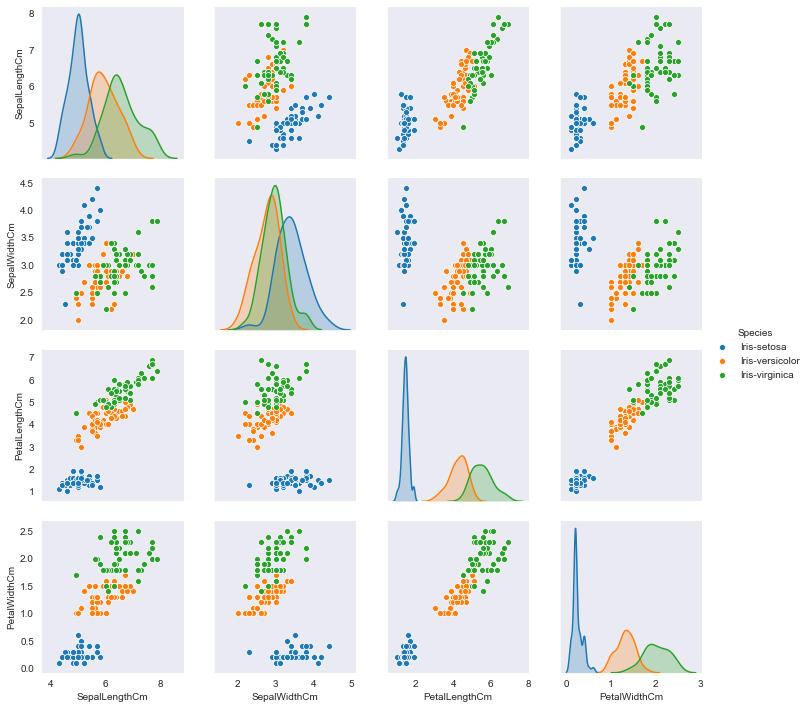

In [ ]:
# visualising the relations between all features towards each other
sns.pairplot(Iris_data.drop(['Id'],axis=1), hue='Species')
plt.show()

In [ ]:
#dropping Id column as of no use now 
Iris_data.drop(['Id'],axis=1,inplace=True)

'digraph Tree {\nnode [shape=box] ;\n0 [label="X[2] <= 2.45\\ngini = 0.667\\nsamples = 150\\nvalue = [50, 50, 50]"] ;\n1 [label="gini = 0.0\\nsamples = 50\\nvalue = [50, 0, 0]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="X[3] <= 1.75\\ngini = 0.5\\nsamples = 100\\nvalue = [0, 50, 50]"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n3 [label="X[2] <= 4.95\\ngini = 0.168\\nsamples = 54\\nvalue = [0, 49, 5]"] ;\n2 -> 3 ;\n4 [label="X[3] <= 1.65\\ngini = 0.041\\nsamples = 48\\nvalue = [0, 47, 1]"] ;\n3 -> 4 ;\n5 [label="gini = 0.0\\nsamples = 47\\nvalue = [0, 47, 0]"] ;\n4 -> 5 ;\n6 [label="gini = 0.0\\nsamples = 1\\nvalue = [0, 0, 1]"] ;\n4 -> 6 ;\n7 [label="X[3] <= 1.55\\ngini = 0.444\\nsamples = 6\\nvalue = [0, 2, 4]"] ;\n3 -> 7 ;\n8 [label="gini = 0.0\\nsamples = 3\\nvalue = [0, 0, 3]"] ;\n7 -> 8 ;\n9 [label="X[0] <= 6.95\\ngini = 0.444\\nsamples = 3\\nvalue = [0, 2, 1]"] ;\n7 -> 9 ;\n10 [label="gini = 0.0\\nsamples = 2\\nvalue = [0

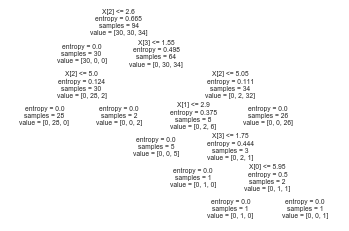

In [ ]:
#now visualising data using decision tree classifier 
from sklearn import tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score


x = Iris_data[['SepalLengthCm' , 'SepalWidthCm' , 'PetalLengthCm' , 'PetalWidthCm']]
y = Iris_data['Species']


#before training the data we have to split the data  in actual train and test dataset
xtrain, xtest, Ytrain , Ytest = train_test_split(x, y, test_size=0.30, random_state=42)

#splitting data into validation train and test 
xt, xcv, Yt, Ycv = train_test_split(xtrain, Ytrain, test_size=0.10, random_state=42)


Iris_clf = DecisionTreeClassifier(criterion ='gini',min_samples_split=2)
Iris_clf.fit(xt,Yt)


#visual Tree formed on train dataset

tree.plot_tree(Iris_clf)

from sklearn.datasets import load_iris
from sklearn import tree

clf = tree.DecisionTreeClassifier()
iris = load_iris()

clf = clf.fit(iris.data, iris.target)
tree.export_graphviz(clf)

